In [399]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [783]:
from sklearn.preprocessing import binarize

In [1080]:
#read data
df = pd.read_csv('/Users/amandakhoo/code/data4all-team6/data/merged_RRI_SRI_data.csv')
df = df[df.notna()]
df.head()
#df.describe()

,date,segment_1307_max_SRI,segment_873_max_SRI,segment_863_max_SRI,segment_1061_max_SRI,segment_235_max_SRI,segment_225_max_SRI,segment_460_max_SRI,segment_518_max_SRI,segment_470_max_SRI,...,station_40840_max_RRI,station_40850_max_RRI,station_40610_max_RRI,station_40600_max_RRI,station_41690_max_RRI,station_41680_max_RRI,station_40280_max_RRI,station_40290_max_RRI,station_41200_max_RRI,station_41210_max_RRI
0,2018-03-08,3.718594,3.457253,4.562368,0.044862,2.945760,4.199607,3.028331,3.724648,4.429002,...,0.940419,1.093750,0.635217,0.460772,1.056587,0.156348,1.037322,1.469957,1.257610,0.466765
1,2018-03-09,4.522901,3.488016,2.997927,0.044862,2.187291,5.328785,3.858570,3.859563,5.073305,...,1.289443,2.337111,0.554911,0.626054,0.820090,1.126202,0.606894,1.308201,0.732345,0.975567
2,2018-03-10,6.107322,1.234070,3.085771,0.044862,2.719971,5.989625,1.741679,3.162777,4.063662,...,3.112223,3.834196,3.938322,3.936778,1.876850,3.942463,3.082432,2.434927,1.473967,3.281961
3,2018-03-11,3.873077,1.261212,6.840369,0.044862,3.189822,5.489281,1.741679,4.638495,6.471925,...,4.748849,4.101958,4.668180,4.061820,2.394439,4.565925,3.578462,3.591185,3.080530,4.589329
4,2018-03-12,5.228657,3.413127,4.470042,0.044862,3.863130,4.415463,4.612428,4.991392,4.664407,...,1.214632,0.721219,0.674600,0.515856,1.015444,0.551766,1.174367,1.354263,0.579096,0.477413


<AxesSubplot:xlabel='segment_1307_max_SRI', ylabel='segment_873_max_SRI'>

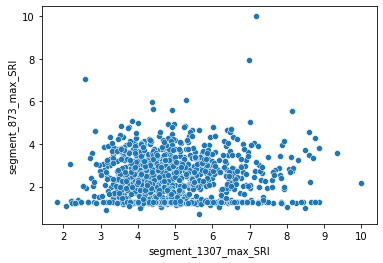

In [41]:
sns.scatterplot(data = df, x = 'segment_1307_max_SRI', y = 'segment_873_max_SRI')

In [403]:
#descriptive statistics on road congestion segments
df.filter(regex=("segment.*")).describe().loc[['mean']].T.sort_values(by = 'mean')
print('largest average daily SRI across all segments: ' +  str(df.filter(regex=("segment.*")).describe().loc[['mean']].T.max()))
print('smallest average daily SRI across all segments: ' +  str(df.filter(regex=("segment.*")).describe().loc[['mean']].T.min()))
print('median average daily SRI across all segments: ' +  str(df.filter(regex=("segment.*")).describe().loc[['mean']].T.median()))


largest average daily SRI across all segments: mean    6.154505
dtype: float64
smallest average daily SRI across all segments: mean    0.033993
dtype: float64
median average daily SRI across all segments: mean    3.136903
dtype: float64


In [404]:
df.filter(regex=("station.*")).describe().loc[['mean']].T.sort_values(by = 'mean')
print('largest average daily RRI across all segments: ' +  str(df.filter(regex=("station.*")).describe().loc[['mean']].T.max()))
print('smallest average daily RRI across all segments: ' +  str(df.filter(regex=("station.*")).describe().loc[['mean']].T.min()))
print('median average daily RRI across all segments: ' +  str(df.filter(regex=("station.*")).describe().loc[['mean']].T.median()))


largest average daily RRI across all segments: mean    2.217636
dtype: float64
smallest average daily RRI across all segments: mean    0.391148
dtype: float64
median average daily RRI across all segments: mean    1.613303
dtype: float64


In [405]:
#binarize into "congested" (0) or "not congested" (0) based on median value of all segment averages SRIs across time period

thresh_sri = df.filter(regex=("segment.*")).describe().loc[['mean']].T.median()[0]
thresh_rri = df.filter(regex=("station.*")).describe().loc[['mean']].T.median()[0]

In [406]:
print(thresh_sri)
print(thresh_rri)

3.136902878892416
1.6133027350605496


In [407]:

sri = df.filter(regex=("segment.*"))
rri = df.filter(regex=("station.*"))

In [408]:
sri_bin = pd.DataFrame(np.where(sri >= thresh_sri, 1,0))
sri_bin.columns = sri.columns
sri_bin.head()

,segment_1307_max_SRI,segment_873_max_SRI,segment_863_max_SRI,segment_1061_max_SRI,segment_235_max_SRI,segment_225_max_SRI,segment_460_max_SRI,segment_518_max_SRI,segment_470_max_SRI,segment_508_max_SRI,...,segment_124_max_SRI,segment_134_max_SRI,segment_771_max_SRI,segment_609_max_SRI,segment_804_max_SRI,segment_814_max_SRI,segment_1218_max_SRI,segment_1208_max_SRI,segment_383_max_SRI,segment_393_max_SRI
0,1,1,1,0,0,1,0,1,1,0,...,1,0,1,0,1,1,0,1,1,1
1,1,1,0,0,0,1,1,1,1,0,...,1,0,1,0,1,1,0,1,1,0
2,1,0,0,0,0,1,0,1,1,0,...,1,0,1,0,1,1,0,1,1,1
3,1,0,1,0,1,1,0,1,1,1,...,1,1,1,0,1,1,1,0,0,1
4,1,1,1,0,1,1,1,1,1,0,...,1,0,1,0,1,1,1,1,0,1


In [409]:
rri_bin = pd.DataFrame(np.where(rri >= thresh_rri, 1, 0))
rri_bin.columns = rri.columns
rri_bin.head()

,station_40050_max_RRI,station_40040_max_RRI,station_40970_max_RRI,station_40960_max_RRI,station_41440_max_RRI,station_41450_max_RRI,station_41330_max_RRI,station_41320_max_RRI,station_40720_max_RRI,station_40730_max_RRI,...,station_40840_max_RRI,station_40850_max_RRI,station_40610_max_RRI,station_40600_max_RRI,station_41690_max_RRI,station_41680_max_RRI,station_40280_max_RRI,station_40290_max_RRI,station_41200_max_RRI,station_41210_max_RRI
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [410]:
df_bin = pd.concat([sri_bin, rri_bin], axis = 1)
df_bin.insert(0, 'date', df['date'])
df_bin.head()

,date,segment_1307_max_SRI,segment_873_max_SRI,segment_863_max_SRI,segment_1061_max_SRI,segment_235_max_SRI,segment_225_max_SRI,segment_460_max_SRI,segment_518_max_SRI,segment_470_max_SRI,...,station_40840_max_RRI,station_40850_max_RRI,station_40610_max_RRI,station_40600_max_RRI,station_41690_max_RRI,station_41680_max_RRI,station_40280_max_RRI,station_40290_max_RRI,station_41200_max_RRI,station_41210_max_RRI
0,2018-03-08,1,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2018-03-09,1,1,0,0,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
2,2018-03-10,1,0,0,0,0,1,0,1,1,...,1,1,1,1,1,1,1,1,0,1
3,2018-03-11,1,0,1,0,1,1,0,1,1,...,1,1,1,1,1,1,1,1,1,1
4,2018-03-12,1,1,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


## Pearson Correlation Matrix

In [79]:
#df_bin.to_csv('/Users/amandakhoo/code/data4all-team6/data/binarizedthresh_RRI_SRI_data.csv')

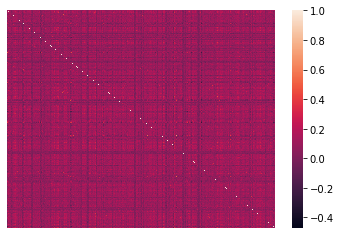

In [411]:
#pearson correlation
sns.heatmap(sri.corr(), yticklabels= False, xticklabels=False)
plt.show()


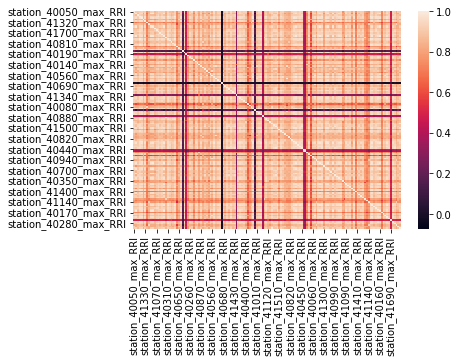

In [412]:
sns.heatmap(rri.corr())
plt.show()


## Chi2 Contingency Test

In [413]:
#chi2
from scipy.stats import chi2_contingency
f = df_bin
x = df_bin.loc[:, df_bin.columns != 'date']
x = pd.crosstab(df_bin.loc[1], df_bin.loc[2]) #grabbed the first two columns just to see
chi2, p, dof, ex=chi2_contingency(x)
ex

array([[2.32534005e+02, 3.54972292e+02, 4.93702771e-01],
       [2.38070529e+02, 3.63424013e+02, 5.05457599e-01],
       [3.95465995e-01, 6.03694374e-01, 8.39630563e-04]])

## Principal Component Analysis

Add labels for weekday and transport type

In [785]:
import datetime

date_time_str = df['date'].values
date_time_weekday = []
for date in date_time_str:
    date_time_obj = datetime.datetime.strptime(date, '%Y-%m-%d')
    date_time_weekday.append(date_time_obj.weekday())

df['weekday'] = date_time_weekday

In [786]:
#don't run this with binary data
#when running with dates as features, we are visualizing how each day (can visualize by day of the week, season, etc)
#contributes to congestion in chicago (proxied by: congestion in streets and subway)

#When running PCA with stations as features, we are visualizing how each station or street (can visualize subway vs street)
#contributes to the congestion in chicago at a time point (proxied by: daily values of SRI or RRI)

In [787]:
#add column to differentiate between road segments and stations
df_T = df.T
df_T = df_T[df_T.notna()]
#df_T.reset_index(inplace=True)
df_T['transport_type'] = None

df_T['transport_type'].loc[df_T.index.str.contains('segment', 'transport_type')] = 'road'
df_T['transport_type'].loc[df_T.index.str.contains('station', 'transport_type')] = 'subway'
df_T['transport_type'].loc[df_T.index.str.contains('date', 'transport_type')] = 'transport_type'

df_T.columns = df_T.loc['date']
df_T.drop('date', inplace = True)

In [788]:
df_T.tail()

date,2018-03-08,2018-03-09,2018-03-10,2018-03-11,2018-03-12,2018-03-13,2018-03-14,2018-03-15,2018-03-16,2018-03-17,...,2021-02-22,2021-02-23,2021-02-24,2021-02-25,2021-02-26,2021-02-27,2021-02-28,2021-03-01,2021-03-02,transport_type
station_40280_max_RRI,1.037322,0.606894,3.082432,3.578462,1.174367,1.673335,-0.007252,0.21597,1.033467,2.890342,...,1.936105,2.392681,2.54159,2.983398,2.654976,-0.705062,-1.478154,2.124222,3.084207,subway
station_40290_max_RRI,1.469957,1.308201,2.434927,3.591185,1.354263,1.014854,1.255127,1.088749,1.849516,1.436162,...,2.501699,2.709323,2.091879,2.968105,2.472791,0.014256,-1.149137,2.288223,2.688357,subway
station_41200_max_RRI,1.25761,0.732345,1.473967,3.08053,0.579096,0.784317,0.911403,0.560095,0.147856,-0.568258,...,1.496472,1.786076,1.917807,2.141696,1.9888,-0.482327,-1.138623,1.411314,1.86504,subway
station_41210_max_RRI,0.466765,0.975567,3.281961,4.589329,0.477413,0.751963,1.414547,1.428569,1.816068,-1.655652,...,2.609158,3.374884,3.27452,3.18116,2.571723,-1.675538,-1.949744,2.694003,3.390129,subway
weekday,3,4,5,6,0,1,2,3,4,5,...,0,1,2,3,4,5,6,0,1,None


In [418]:
df.columns[df.columns != ('weekday','date')]
df_T.columns[df_T.columns  != 'transport_type']
df.loc[:,df.columns[df.columns != ('weekday','date')]]

,date,segment_1307_max_SRI,segment_873_max_SRI,segment_863_max_SRI,segment_1061_max_SRI,segment_235_max_SRI,segment_225_max_SRI,segment_460_max_SRI,segment_518_max_SRI,segment_470_max_SRI,...,station_40850_max_RRI,station_40610_max_RRI,station_40600_max_RRI,station_41690_max_RRI,station_41680_max_RRI,station_40280_max_RRI,station_40290_max_RRI,station_41200_max_RRI,station_41210_max_RRI,weekday
0,2018-03-08,3.718594,3.457253,4.562368,0.044862,2.945760,4.199607,3.028331,3.724648,4.429002,...,1.093750,0.635217,0.460772,1.056587,0.156348,1.037322,1.469957,1.257610,0.466765,3
1,2018-03-09,4.522901,3.488016,2.997927,0.044862,2.187291,5.328785,3.858570,3.859563,5.073305,...,2.337111,0.554911,0.626054,0.820090,1.126202,0.606894,1.308201,0.732345,0.975567,4
2,2018-03-10,6.107322,1.234070,3.085771,0.044862,2.719971,5.989625,1.741679,3.162777,4.063662,...,3.834196,3.938322,3.936778,1.876850,3.942463,3.082432,2.434927,1.473967,3.281961,5
3,2018-03-11,3.873077,1.261212,6.840369,0.044862,3.189822,5.489281,1.741679,4.638495,6.471925,...,4.101958,4.668180,4.061820,2.394439,4.565925,3.578462,3.591185,3.080530,4.589329,6
4,2018-03-12,5.228657,3.413127,4.470042,0.044862,3.863130,4.415463,4.612428,4.991392,4.664407,...,0.721219,0.674600,0.515856,1.015444,0.551766,1.174367,1.354263,0.579096,0.477413,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,2021-02-26,4.258234,2.068701,3.244413,0.044862,2.701035,5.490904,1.985785,3.294937,4.649058,...,2.395997,3.268005,2.350529,2.430125,2.475950,2.654976,2.472791,1.988800,2.571723,4
1087,2021-02-27,6.571222,1.297487,2.453811,0.044862,2.155135,4.226209,1.741679,2.919185,4.413877,...,-0.846204,-1.711895,-0.298688,0.278178,-1.563520,-0.705062,0.014256,-0.482327,-1.675538,5
1088,2021-02-28,5.000275,1.261212,3.075822,0.044862,3.470551,3.985033,1.748345,2.094229,5.568938,...,-1.491179,-2.599722,-0.740329,-0.374611,-1.950311,-1.478154,-1.149137,-1.138623,-1.949744,6
1089,2021-03-01,5.120739,1.320598,1.998474,0.044862,2.687221,3.544707,1.741679,5.393069,4.176739,...,3.050904,2.880534,1.707844,1.898254,3.064025,2.124222,2.288223,1.411314,2.694003,0


In [789]:
df_T

date,2018-03-08,2018-03-09,2018-03-10,2018-03-11,2018-03-12,2018-03-13,2018-03-14,2018-03-15,2018-03-16,2018-03-17,...,2021-02-22,2021-02-23,2021-02-24,2021-02-25,2021-02-26,2021-02-27,2021-02-28,2021-03-01,2021-03-02,transport_type
segment_1307_max_SRI,3.718594,4.522901,6.107322,3.873077,5.228657,3.984405,5.725434,4.139012,4.723373,4.25032,...,2.526955,3.838945,6.363693,2.166459,4.258234,6.571222,5.000275,5.120739,3.481981,road
segment_873_max_SRI,3.457253,3.488016,1.23407,1.261212,3.413127,3.339473,3.575611,2.579178,1.889546,2.151411,...,2.008861,1.964313,1.445855,3.067277,2.068701,1.297487,1.261212,1.320598,1.715255,road
segment_863_max_SRI,4.562368,2.997927,3.085771,6.840369,4.470042,3.895576,2.999246,4.325552,5.123345,1.522649,...,3.431631,3.350316,3.753374,1.709012,3.244413,2.453811,3.075822,1.998474,1.774546,road
segment_1061_max_SRI,0.044862,0.044862,0.044862,0.044862,0.044862,0.044862,0.044862,0.044862,0.044862,0.044862,...,0.044862,0.044862,0.044862,0.044862,0.044862,0.044862,0.044862,0.044862,0.044862,road
segment_235_max_SRI,2.94576,2.187291,2.719971,3.189822,3.86313,3.041684,2.499032,3.195773,2.260985,3.050464,...,3.793119,2.179415,3.000081,3.243831,2.701035,2.155135,3.470551,2.687221,2.720894,road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
station_40280_max_RRI,1.037322,0.606894,3.082432,3.578462,1.174367,1.673335,-0.007252,0.21597,1.033467,2.890342,...,1.936105,2.392681,2.54159,2.983398,2.654976,-0.705062,-1.478154,2.124222,3.084207,subway
station_40290_max_RRI,1.469957,1.308201,2.434927,3.591185,1.354263,1.014854,1.255127,1.088749,1.849516,1.436162,...,2.501699,2.709323,2.091879,2.968105,2.472791,0.014256,-1.149137,2.288223,2.688357,subway
station_41200_max_RRI,1.25761,0.732345,1.473967,3.08053,0.579096,0.784317,0.911403,0.560095,0.147856,-0.568258,...,1.496472,1.786076,1.917807,2.141696,1.9888,-0.482327,-1.138623,1.411314,1.86504,subway
station_41210_max_RRI,0.466765,0.975567,3.281961,4.589329,0.477413,0.751963,1.414547,1.428569,1.816068,-1.655652,...,2.609158,3.374884,3.27452,3.18116,2.571723,-1.675538,-1.949744,2.694003,3.390129,subway


In [790]:
#normalize
from sklearn.preprocessing import StandardScaler

c = df_T # vs df[df.notna()]
c = df_T.dropna()

features = c.columns[c.columns != 'transport_type'] #drop target

# Separating out the features
x = c.loc[:,features].values
# Separating out the target
y = c.loc[:,['transport_type']].values
# Standardizing the features
X = StandardScaler().fit_transform(x)

In [791]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3'])
principalDf['transport_type'] = c.transport_type.values
principalDf

,pc1,pc2,pc3,transport_type
0,42.444775,7.785276,-0.937777,road
1,-11.456787,-11.668187,13.102701,road
2,17.262733,-0.869982,-0.181273,road
3,-66.959898,-26.900375,-2.980852,road
4,-6.201094,-5.325869,-1.757282,road
...,...,...,...,...
1166,-32.753739,29.076649,1.885526,subway
1167,-38.219912,18.387861,-0.057215,subway
1168,-34.637866,17.800940,0.913266,subway
1169,-47.662805,6.554108,-1.293735,subway


In [792]:
[index for index, row in X.iterrows() if row.isnull().any()]

AttributeError: 'numpy.ndarray' object has no attribute 'iterrows'

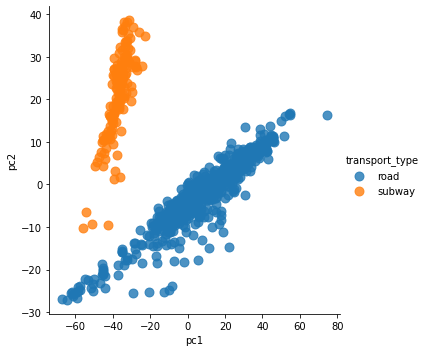

In [793]:
sns.lmplot( x="pc1", y="pc2",
  data=principalDf, 
  fit_reg=False,
  legend=True,
           hue = 'transport_type',
  scatter_kws={"s": 80})

plt.show()

In [588]:
pca.explained_variance_ratio_ #2 components only less than 20% of data variance is described

array([0.45615098, 0.10810713, 0.011794  ])

## Hierarchical Clustering

In [589]:
import matplotlib.pyplot as plt
import numpy
import scipy.cluster.hierarchy as hcluster

In [1075]:
c = df_T # vs df[df.notna()]
c = df_T.dropna()

features = c.columns[c.columns != 'transport_type'] #drop target

# Separating out the features
x = c.loc[:,features].values
# Separating out the target
y = c.loc[:,['transport_type']].values
# Standardizing the features
X = StandardScaler().fit_transform(x)

# clustering
thresh = 11
clusters = hcluster.fclusterdata(principalComponents, thresh, criterion="distance")

clusters

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [1076]:
len(np.unique(clusters))

3

In [1077]:
#plot the clusters on pca axes
principalDf['clusters'] = clusters
principalDf

,pc1,pc2,pc3,transport_type,dbscan_clusters,aggro_clusters,clusters
0,42.444775,7.785276,-0.937777,road,0,0,2
1,-11.456787,-11.668187,13.102701,road,0,0,2
2,17.262733,-0.869982,-0.181273,road,0,0,2
3,-66.959898,-26.900375,-2.980852,road,0,1,2
4,-6.201094,-5.325869,-1.757282,road,0,0,2
...,...,...,...,...,...,...,...
1166,-32.753739,29.076649,1.885526,subway,1,1,1
1167,-38.219912,18.387861,-0.057215,subway,1,1,1
1168,-34.637866,17.800940,0.913266,subway,1,1,1
1169,-47.662805,6.554108,-1.293735,subway,1,1,1


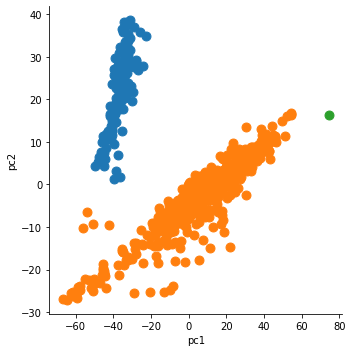

In [1078]:
sns.lmplot( x="pc1", y="pc2",
  data=principalDf, 
  fit_reg=False,
  legend=False,
           hue = 'clusters',
  scatter_kws={"s": 80, "alpha": 1})

plt.show()

In [781]:
import plotly.express as px
from sklearn.decomposition import PCA

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    principalDf, x=principalDf['pc1'], y=principalDf['pc2'], z= principalDf['pc3'], color=principalDf['clusters'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

## Agglomerative clustering

In [931]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='ward', n_clusters = 2).fit(principalComponents)
clustering
AgglomerativeClustering()
clustering.labels_

array([0, 0, 0, ..., 1, 1, 1])

In [932]:
len(clustering.labels_)

1171

In [933]:
principalDf['aggro_clusters'] = clustering.labels_

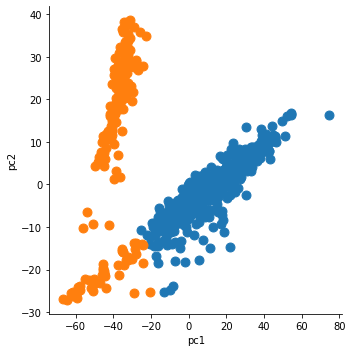

In [934]:
sns.lmplot( x="pc1", y="pc2",
  data=principalDf, 
  fit_reg=False,
  legend=False,
           hue = 'aggro_clusters',
  scatter_kws={"s": 80, "alpha": 1})

plt.show()

In [935]:
import plotly.express as px
from sklearn.decomposition import PCA

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    principalDf, x=principalDf['pc1'], y=principalDf['pc2'], z= principalDf['pc3'], color=principalDf['aggro_clusters'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

## DBSCAN

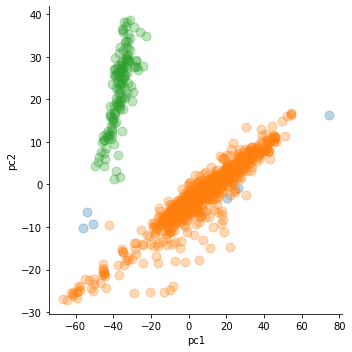

,pc1,pc2,pc3,transport_type,dbscan_clusters
0,42.444775,7.785276,-0.937777,road,0
1,-11.456787,-11.668187,13.102701,road,0
2,17.262733,-0.869982,-0.181273,road,0
3,-66.959898,-26.900375,-2.980852,road,0
4,-6.201094,-5.325869,-1.757282,road,0
...,...,...,...,...,...
1166,-32.753739,29.076649,1.885526,subway,1
1167,-38.219912,18.387861,-0.057215,subway,1
1168,-34.637866,17.800940,0.913266,subway,1
1169,-47.662805,6.554108,-1.293735,subway,1


In [906]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps = 10, min_samples= 5).fit(principalComponents)
principalDf['dbscan_clusters'] = clustering.labels_

sns.lmplot( x="pc1", y="pc2",
  data=principalDf, 
  fit_reg=False,
  legend=False,
           hue = 'dbscan_clusters',
  scatter_kws={"s": 80, "alpha": 0.3})

plt.show()
principalDf

In [936]:
import plotly.express as px
from sklearn.decomposition import PCA

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    principalDf, x=principalDf['pc1'], y=principalDf['pc2'], z= principalDf['pc3'], color=principalDf['dbscan_clusters'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [937]:
#lets look closer at group 1

group_1_index = principalDf[principalDf['dbscan_clusters'] == 2].index.values
group_1_index
df_T.reset_index().iloc[[1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038,
       1039, 1040, 1041, 1042, 1043, 1044, 1045, 1046, 1047, 1048, 1049,
       1050, 1051, 1052, 1053, 1055, 1057, 1058, 1059, 1060, 1061, 1062,
       1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073,
       1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1083, 1084, 1085,
       1086, 1087, 1088, 1089, 1090, 1091, 1093, 1094, 1095, 1097, 1098,
       1099, 1100, 1101, 1102, 1103, 1104, 1105, 1106, 1107, 1108, 1109,
       1110, 1111, 1112, 1113, 1114, 1115, 1116, 1117, 1120, 1121, 1122,
       1123, 1124, 1125, 1126, 1127, 1128, 1129, 1130, 1131, 1132, 1133,
       1134, 1135, 1136, 1137, 1138, 1139, 1140, 1141, 1142, 1143, 1144,
       1145, 1146, 1147, 1148, 1149, 1150, 1151, 1152, 1153, 1154, 1155,
       1156, 1157, 1158, 1159, 1160, 1161, 1162, 1163, 1164, 1166, 1167,
       1168, 1169, 1170]]

date,index,2018-03-08,2018-03-09,2018-03-10,2018-03-11,2018-03-12,2018-03-13,2018-03-14,2018-03-15,2018-03-16,...,2021-02-22,2021-02-23,2021-02-24,2021-02-25,2021-02-26,2021-02-27,2021-02-28,2021-03-01,2021-03-02,transport_type
1028,segment_358_max_SRI,2.649408,6.366861,4.283869,4.428664,4.80592,4.552395,5.047841,3.692458,5.225999,...,5.285959,2.720989,2.671031,3.364552,2.460597,4.106882,4.098758,2.018448,2.872418,road
1029,segment_230_max_SRI,3.019132,4.4786,2.820642,4.887956,2.672032,3.53114,2.757259,2.778808,4.443008,...,2.49292,2.722017,3.256672,3.513461,3.378851,2.747996,3.009125,3.277178,2.425133,road
1030,segment_348_max_SRI,5.414281,5.265743,5.197608,5.517357,5.091408,3.981914,6.374742,5.74394,4.89861,...,3.475289,4.045847,2.336165,4.404464,4.042714,2.709629,4.177215,6.999971,2.915747,road
1031,segment_465_max_SRI,3.441748,3.033374,3.816286,2.441611,2.589137,2.320844,3.478136,2.175663,4.20204,...,2.13691,1.817121,3.192606,2.790362,2.779237,3.25627,2.854679,2.08971,1.348414,road
1032,segment_417_max_SRI,2.965742,3.45534,3.15262,2.955513,3.8975,6.01794,3.418281,4.442515,4.140176,...,4.303874,2.579004,2.079107,3.72973,4.32363,5.21807,3.537964,2.261633,4.147839,road
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1166,station_41410_max_RRI,0.903548,0.208256,4.08357,4.927728,1.010373,0.883497,0.96165,1.230589,0.794049,...,2.860583,3.435804,3.376845,3.476662,3.160162,-1.832511,-2.409621,3.027571,3.659878,subway
1167,station_40480_max_RRI,1.000135,0.721998,2.288695,3.717171,1.007852,0.966432,0.623262,1.807016,1.789163,...,1.884142,2.803604,2.842185,2.603052,2.804272,-0.6677,-1.306314,2.380851,2.979296,subway
1168,station_40490_max_RRI,1.296761,1.046384,2.565315,3.767285,1.003008,1.399926,1.213939,1.536034,1.515787,...,2.403596,2.9613,3.105266,3.183516,3.124406,-1.57625,-1.935654,2.494276,3.189905,subway
1169,station_41360_max_RRI,1.159764,1.376723,2.311133,2.651016,1.130836,1.311698,1.716605,1.737432,1.737223,...,2.223194,2.779758,3.097797,2.938374,3.394219,-1.141847,-1.65978,2.331778,3.196721,subway


## tSNE

In [938]:
#normalize
from sklearn.manifold import TSNE

c = df_T # vs df[df.notna()]
c = df_T.dropna()

features = c.columns[c.columns != 'transport_type'] #drop target

# Separating out the features
x = c[features]
# Separating out the target
y = c.loc[:,['transport_type']].values
# Standardizing the features
X = StandardScaler().fit_transform(x)
X = pd.DataFrame(X)

#TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, random_state = 88)
tsne_results = tsne.fit_transform(X)


/Users/amandakhoo/code/scratch/.venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Users/amandakhoo/code/scratch/.venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 1171 samples in 0.001s...
[t-SNE] Computed neighbors for 1171 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1171
[t-SNE] Computed conditional probabilities for sample 1171 / 1171
[t-SNE] Mean sigma: 3.822249
[t-SNE] KL divergence after 250 iterations with early exaggeration: 128.537140
[t-SNE] KL divergence after 1000 iterations: 2.178117


In [939]:
tsne_results_df = pd.DataFrame(tsne_results)
tsne_results_df['transport_type'] = y
tsne_results_df.columns = ['tsne1', 'tsne2', 'transport_type']
tsne_results_df

,tsne1,tsne2,transport_type
0,25.367100,-56.536572,road
1,17.290989,25.139780,road
2,-23.924770,-35.809589,road
3,45.359333,48.300579,road
4,-4.126809,50.037834,road
...,...,...,...
1166,57.866230,-17.509295,subway
1167,65.564545,3.096129,subway
1168,42.810287,7.850196,subway
1169,64.525497,13.078588,subway


<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

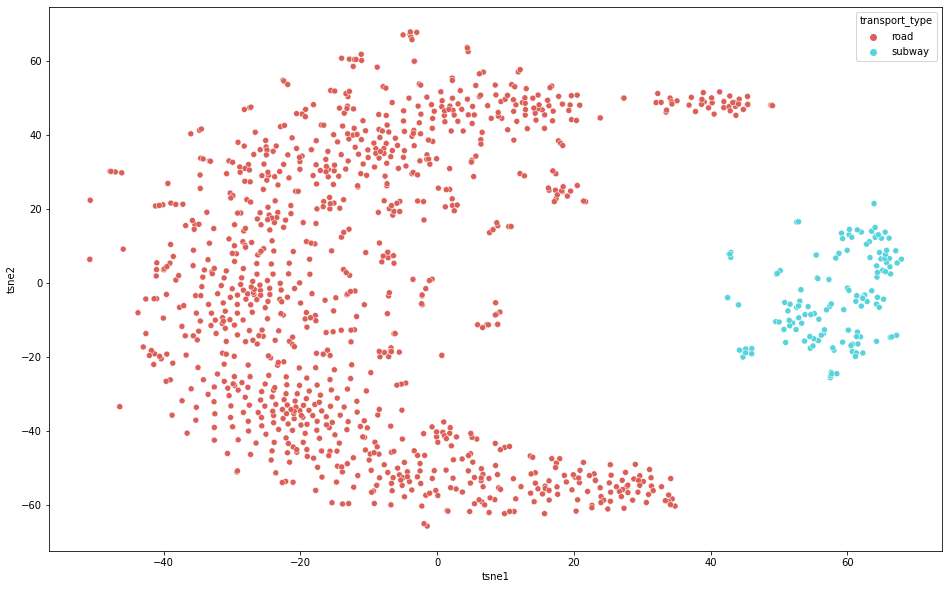

In [873]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    palette=sns.color_palette("hls", 2),
    data=tsne_results_df, hue = 'transport_type',
    legend="full",
    alpha=1
)

In [885]:
#Agglomerative clustering:
# clustering
thresh = 15
clusters = hcluster.fclusterdata(tsne_results, thresh, criterion="distance")

clusters

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [886]:
tsne_results_df['agglo_clusters'] = clusters

<AxesSubplot:xlabel='tsne1', ylabel='tsne2'>

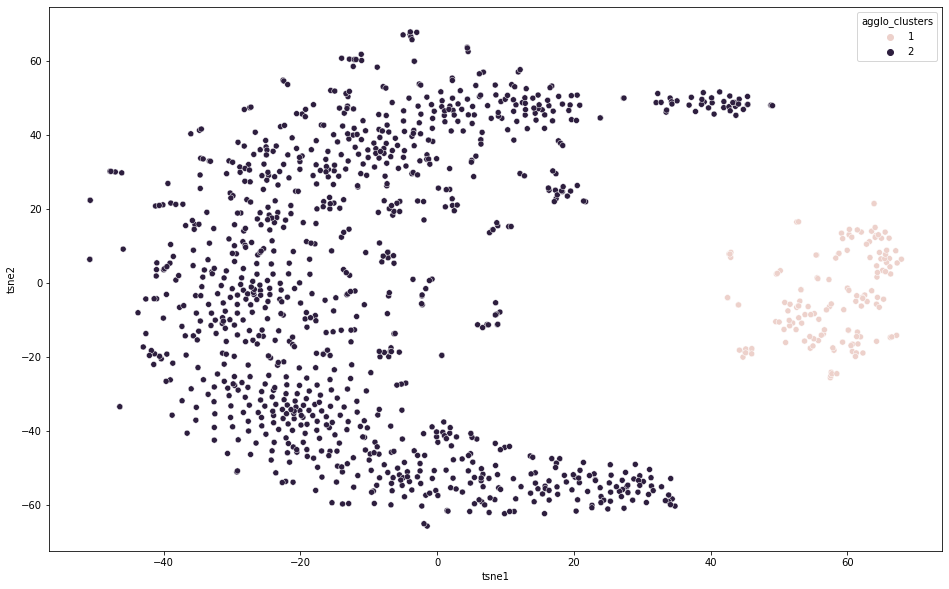

In [887]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne1", y="tsne2",
    data=tsne_results_df, hue = 'agglo_clusters',
    legend="full",
    alpha=1
)

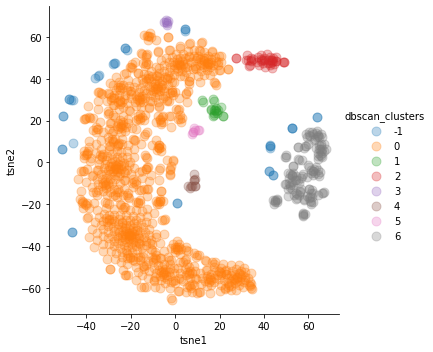

In [1079]:
#DBSCAN
clustering = DBSCAN(eps = 6, min_samples= 5).fit(tsne_results)
tsne_results_df['dbscan_clusters'] = clustering.labels_

sns.lmplot( x="tsne1", y="tsne2",
  data=tsne_results_df, 
  fit_reg=False,
  legend=True,
           hue = 'dbscan_clusters',
  scatter_kws={"s": 80, "alpha": 0.3})

plt.show()

In [942]:
np.unique(tsne_results_df['dbscan_clusters'])

array([-1,  0,  1,  2,  3,  4,  5,  6])

In [990]:
red_group = tsne_results_df[tsne_results_df['dbscan_clusters'] == 2].index.values
red_group_df = df_T.iloc[red_group]
red_group_df_T = red_group_df.drop('transport_type', axis = 1).T

#red_gropu_df_T['sevendayavg'] = corona_ny.positiveIncrease.rolling(7).mean().shift(-3)

In [1056]:
red_ids = []
for i in range(len(red_group_df_T.columns)):
    red_id = red_group_df_T.columns[i].split('_')[1]
    red_ids.append(red_id)

In [1057]:
red_ids

['1061',
 '946',
 '887',
 '605',
 '827',
 '587',
 '139',
 '129',
 '1034',
 '19',
 '335',
 '584',
 '1178',
 '226',
 '689',
 '34',
 '410',
 '148',
 '356',
 '85',
 '379',
 '64',
 '656',
 '1188',
 '530',
 '240',
 '950',
 '374',
 '466',
 '81',
 '538',
 '23',
 '298',
 '815',
 '207',
 '980',
 '559',
 '82',
 '443',
 '194',
 '50']

<AxesSubplot:xlabel='date'>

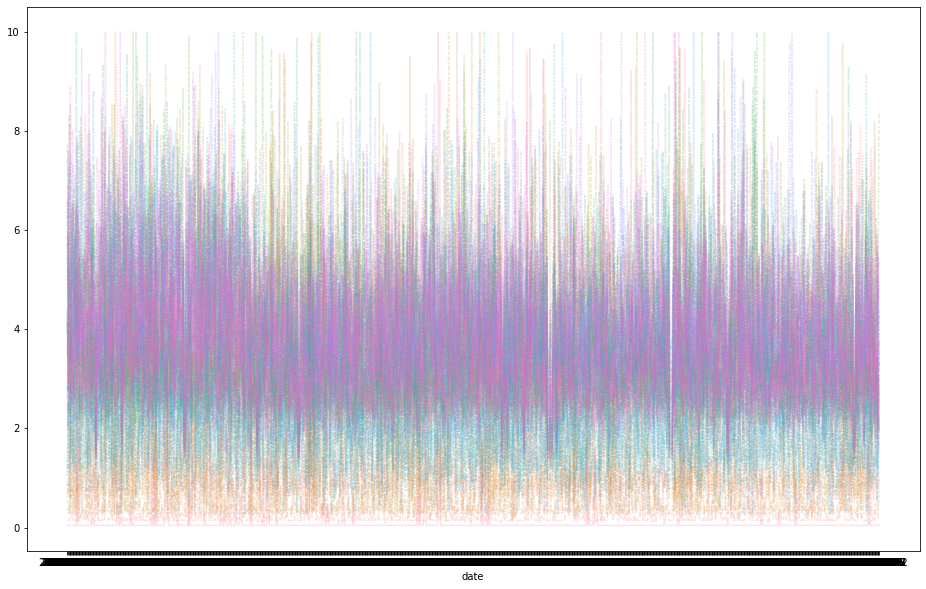

In [1060]:
plt.figure(figsize=(16,10))
sns.lineplot(data = red_group_df_T, legend = False, alpha = 0.2)

<AxesSubplot:>

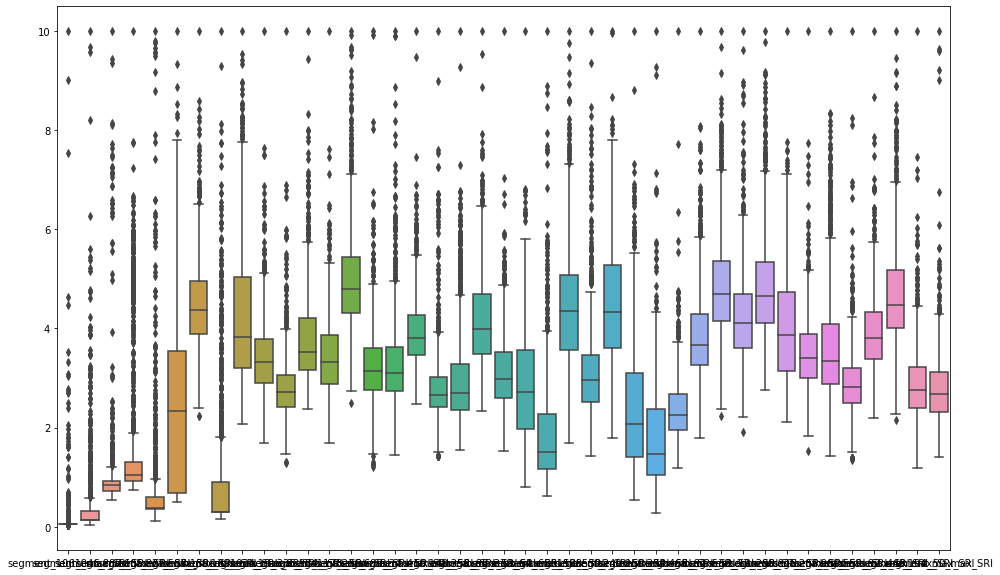

In [1031]:
plt.figure(figsize=(16,10))
sns.boxplot(data = red_group_df_T)

/Users/amandakhoo/code/scratch/.venv/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/Users/amandakhoo/code/scratch/.venv/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/Users/amandakhoo/code/scratch/.venv/lib/python3.8/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



<AxesSubplot:ylabel='Density'>

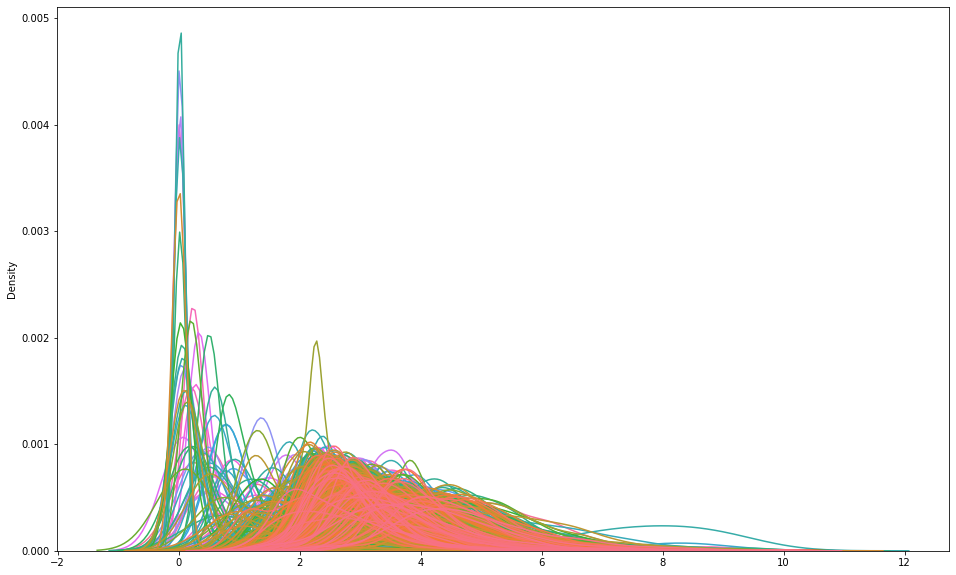

In [1036]:
orange_group = tsne_results_df[tsne_results_df['dbscan_clusters'] == 0].index.values
orange_group_df = df_T.iloc[orange_group]
orange_group_df_T = orange_group_df.drop('transport_type', axis = 1).T

plt.figure(figsize=(16,10))
sns.kdeplot(data = orange_group_df_T, legend = False)

<AxesSubplot:xlabel='date'>

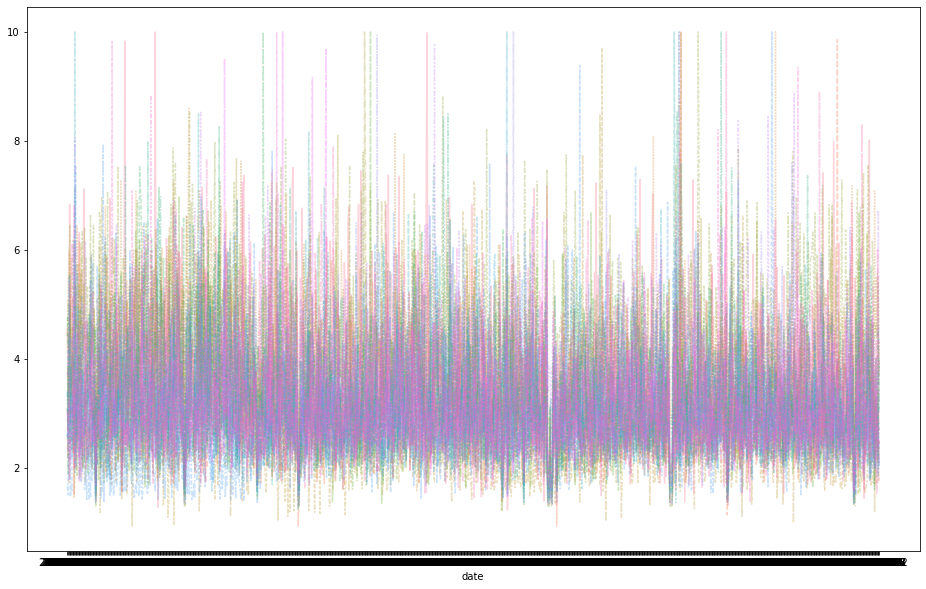

In [1061]:
plt.figure(figsize=(16,10))
sns.lineplot(data = orange_group_df_T.iloc[:,1:20], legend = False, alpha = 0.3)

In [1000]:
sns.heatmap(red_group_df[red_group_df.columns[red_group_df.columns != 'transport_type']].corr)

ValueError: Must pass 2-d input. shape=()